In [32]:
# Wczytanie potrzebnych pakietów
from sklearn.datasets import load_iris
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from yellowbrick.model_selection import (ValidationCurve, LearningCurve)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import tree


In [50]:
# Wczytanie danych
iris = load_iris()
X = iris.data[:,2:]
Y = iris.target

# Podgląd danych
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)    
iris_df.sample(10)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3
114,5.8,2.8,5.1,2.4
36,5.5,3.5,1.3,0.2
147,6.5,3.0,5.2,2.0
104,6.5,3.0,5.8,2.2
96,5.7,2.9,4.2,1.3
112,6.8,3.0,5.5,2.1
42,4.4,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2


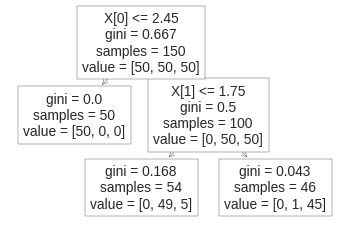

In [70]:
# Utworzenie drzewa decyzyjnego
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)
export_graphviz(tree_clf, out_file="iris_drzewo.dot",
                feature_names=iris.feature_names[2:],class_names=iris.target_names,
                rounded=True, filled=True)
tree.plot_tree(tree_clf);



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


[Text(0, 0.5, 'Ocena'),
 Text(0.5, 0, 'max_depth'),
 Text(0.5, 1.0, 'Krzywa weryfikacji dla drzewa losowego')]

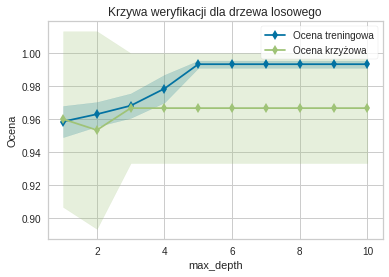

In [71]:
# Utworzenie krzywej weryfikacji
fig, ax = plt.subplots(figsize=(6,4))
vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100), param_name="max_depth",
                         param_range=np.arange(1,11), cv=10, n_jobs=-1)
vc_viz.fit(X,Y)
ax.legend(("Ocena treningowa", "Ocena krzyżowa"),frameon=True)
vc_viz.ax.set(title="Krzywa weryfikacji dla drzewa losowego", xlabel="max_depth",
              ylabel="Ocena")



Wniosek: Ocena krzyżowa jest najwyższa dla hiperparametru 3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


[Text(0, 0.5, 'Ocena'),
 Text(0.5, 0, 'Liczba próbek'),
 Text(0.5, 1.0, 'Krzywa uczenia dla drzewa losowego')]

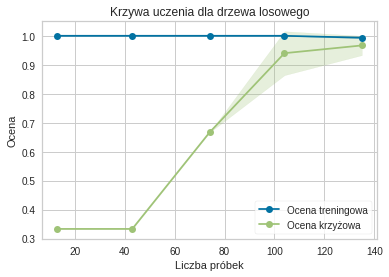

In [62]:
# Utworzenie krzywej uczenia
fig, ax = plt.subplots(figsize=(6,4))
lc3_viz = LearningCurve(RandomForestClassifier(n_estimators=100),cv=10)
lc3_viz.fit(X,Y)
ax.legend(("Ocena treningowa","Ocena krzyżowa"), frameon=True)
lc3_viz.ax.set(title="Krzywa uczenia dla drzewa losowego",
               xlabel="Liczba próbek", ylabel="Ocena")

Wniosek: Im większa ilość danych tym lepszy wynik modelu